# Mini-Proyecto: Predicción de Fuga de Clientes

El objetivo: Crear un notebook de Python que analice datos de clientes de una empresa de telecomunicaciones, construya un modelo de clasificación para predecir la fuga (churn) y extraiga conclusiones de negocio.

## Fase 1: Carga y Análisis Exporatorio (EDA)

### Importaremos las librerías necesarias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score

### Cargamos el archivo CSV con los datos de los clientes

In [52]:
df = pd.read_csv('data.csv')

### Impeccionaremos los datos:

In [53]:
df.head()

,customerID,antiguedad_meses,tipo_contrato,gasto_mensual,gasto_total,producto_principal,llamadas_soporte,churn
0,1,1,Mensual,29.85,29.85,Fibra,1,Si
1,2,34,Anual,56.95,1889.50,Movil,1,No
2,3,2,Mensual,53.85,108.15,Fibra,4,Si
3,4,45,Anual,42.30,1840.75,Fibra,1,No
4,5,2,Mensual,70.70,151.65,Fibra+Movil,0,Si


In [32]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customerID          200 non-null    int64  
 1   antiguedad_meses    200 non-null    int64  
 2   tipo_contrato       200 non-null    str    
 3   gasto_mensual       200 non-null    float64
 4   gasto_total         200 non-null    float64
 5   producto_principal  200 non-null    str    
 6   llamadas_soporte    200 non-null    int64  
 7   churn               200 non-null    str    
dtypes: float64(2), int64(3), str(3)
memory usage: 12.6 KB


In [33]:
df.describe()

,customerID,antiguedad_meses,gasto_mensual,gasto_total,llamadas_soporte
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,24.540000,63.426750,2170.581250,0.355000
std,57.879185,27.711877,38.013761,2912.254914,0.801365
min,1.000000,1.000000,18.950000,19.200000,0.000000
25%,50.750000,1.000000,25.037500,29.887500,0.000000
50%,100.500000,9.000000,56.550000,483.700000,0.000000
75%,150.250000,50.500000,104.050000,3601.637500,0.000000
max,200.000000,72.000000,118.750000,8672.450000,4.000000


### Vamos a visualizar patrones:

<Axes: xlabel='churn', ylabel='count'>

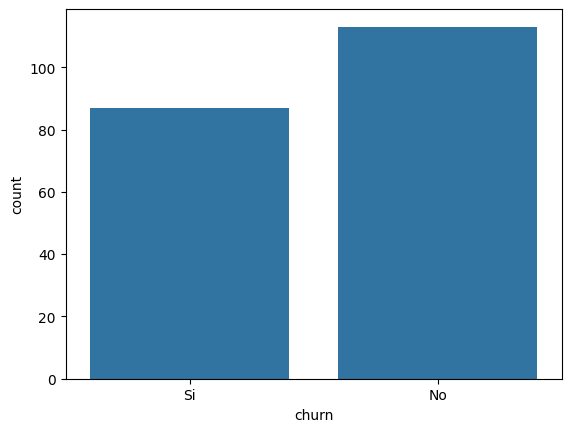

In [34]:
sns.countplot(x='churn', data=df)

En lo anterior, podemos ver el balance de clientes que se van vs los que se quedan

<Axes: xlabel='tipo_contrato', ylabel='count'>

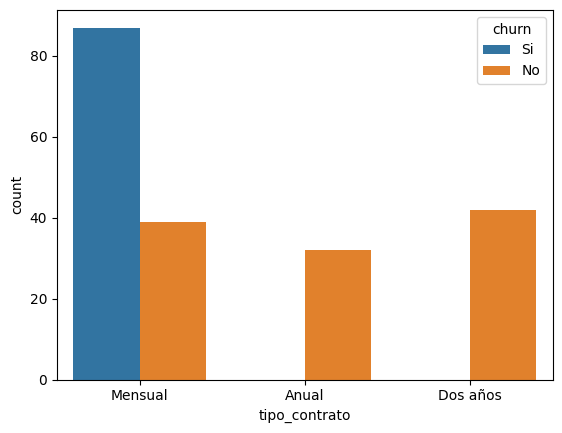

In [35]:
sns.countplot(x='tipo_contrato', hue='churn', data=df)

En este gráfico podemos obsevar el tipo de contrato = 'Mensual' es un gran indicador de fuga

<Axes: xlabel='churn', ylabel='antiguedad_meses'>

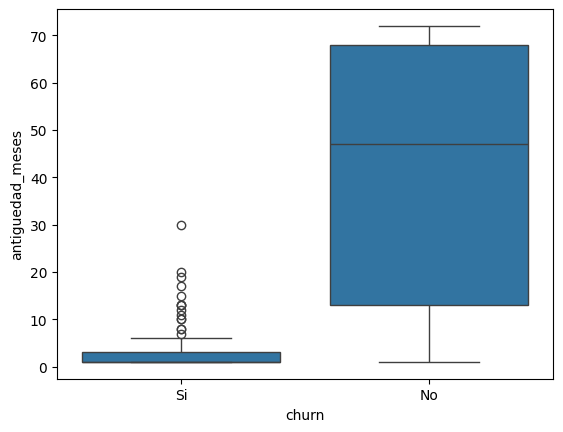

In [36]:
sns.boxplot(x='churn', y='antiguedad_meses', data=df)

Aquí podemos ver que los clientes que se van tienen mucha menos antigüedad

<Axes: xlabel='llamadas_soporte', ylabel='Count'>

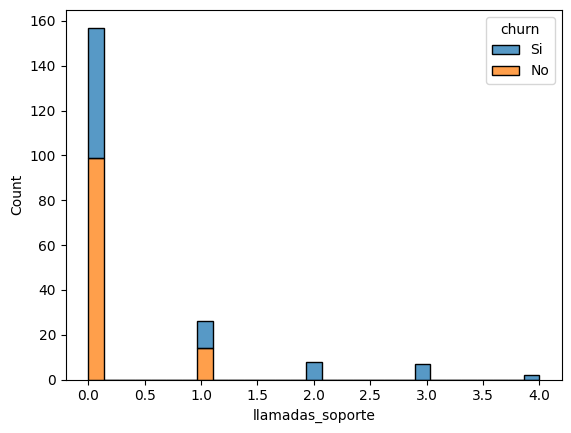

In [37]:
sns.histplot(data=df, x='llamadas_soporte', hue='churn', multiple='stack')

Se ve la relación entre llamadas a soporte y la fuga

# Fase 2: Preprocesamiento y Modelado

### Convertimos las variables categóricas en numéricas.

Para la columna churn pasamos de tener una variable categórica a una variable binaria que será la que usaremos para predecir. Aplicamos one-hot encoding a las variables categóricas restantes.

In [54]:
df.head()

,customerID,antiguedad_meses,tipo_contrato,gasto_mensual,gasto_total,producto_principal,llamadas_soporte,churn
0,1,1,Mensual,29.85,29.85,Fibra,1,Si
1,2,34,Anual,56.95,1889.50,Movil,1,No
2,3,2,Mensual,53.85,108.15,Fibra,4,Si
3,4,45,Anual,42.30,1840.75,Fibra,1,No
4,5,2,Mensual,70.70,151.65,Fibra+Movil,0,Si


In [88]:
df['churn'] = df['churn'].apply(lambda x: 1 if x == 'Si' else 0)

In [89]:
df.head()

,customerID,antiguedad_meses,tipo_contrato,gasto_mensual,gasto_total,producto_principal,llamadas_soporte,churn
0,1,1,Mensual,29.85,29.85,Fibra,1,0
1,2,34,Anual,56.95,1889.50,Movil,1,0
2,3,2,Mensual,53.85,108.15,Fibra,4,0
3,4,45,Anual,42.30,1840.75,Fibra,1,0
4,5,2,Mensual,70.70,151.65,Fibra+Movil,0,0


### 2. Definimos las variables

In [90]:
# X serán todas las columnas de características, excepto 'churn' y 'customer_id'
# y será la columna objetivo 'churn'

X = df.drop(columns=['customerID', 'churn']) 

# Convertir variables categóricas a numéricas usando get_dummies
X_dummies = pd.get_dummies(X, drop_first=True)

y = df['churn']

In [91]:
X_dummies.head()

,antiguedad_meses,gasto_mensual,gasto_total,llamadas_soporte,tipo_contrato_Dos años,tipo_contrato_Mensual,producto_principal_Fibra+Movil,producto_principal_Movil
0,1,29.85,29.85,1,False,True,False,False
1,34,56.95,1889.50,1,False,False,False,True
2,2,53.85,108.15,4,False,True,False,False
3,45,42.30,1840.75,1,False,False,False,False
4,2,70.70,151.65,0,False,True,True,False


In [60]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: churn, dtype: int64

### 3. Dividimos los datos en conjuntos de entrenamiento y prueba

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, test_size=0.2, random_state=42)


In [71]:
X_train.head()

,antiguedad_meses,gasto_mensual,gasto_total,llamadas_soporte,tipo_contrato_Dos años,tipo_contrato_Mensual,producto_principal_Fibra+Movil,producto_principal_Movil
79,2,39.55,85.50,0,False,True,False,False
197,72,24.80,1742.80,0,True,False,False,True
38,3,99.45,310.60,3,False,True,True,False
24,30,59.30,1844.75,3,False,True,False,False
122,5,100.80,516.75,0,False,True,True,False


In [72]:
X_test.head()

,antiguedad_meses,gasto_mensual,gasto_total,llamadas_soporte,tipo_contrato_Dos años,tipo_contrato_Mensual,producto_principal_Fibra+Movil,producto_principal_Movil
95,1,19.75,19.75,0,False,True,False,True
15,52,20.65,1022.95,0,False,False,False,True
30,7,74.90,534.90,0,False,True,True,False
158,1,35.00,35.00,0,False,True,False,False
128,64,111.80,7192.15,0,True,False,True,False


In [73]:
y_train.head()

79     1
197    0
38     1
24     1
122    0
Name: churn, dtype: int64

In [74]:
y_test.head()

95     1
15     0
30     0
158    1
128    0
Name: churn, dtype: int64

### 4. Entrenamos el modelo

In [75]:
# Modelo: Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

# Fase 3: Evaluación e Interpretación

### 1. Predicciones

In [76]:
predicciones = model.predict(X_test)
predicciones

array([0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0])

### 2. Evaluar rendimiento

In [77]:
import sklearn.metrics as metrics

print(metrics.classification_report(y_test, predicciones))


              precision    recall  f1-score   support

           0       0.90      0.76      0.83        25
           1       0.68      0.87      0.76        15

    accuracy                           0.80        40
   macro avg       0.79      0.81      0.80        40
weighted avg       0.82      0.80      0.80        40



Analicemos lo obtenido en las predicciones:

- Accuracy (Exactitud): 0.80 (80%)
Lo que significa: De todos los clientes del conjunto de prueba (40 en total), tu modelo ha acertado en el 80% de los casos (32 clientes). Es una buena métrica general, pero no cuenta toda la historia.

- Precision: 0.68 (68%): "De todos los clientes que tu modelo etiquetó como 'en riesgo de fuga', el 68% realmente se fueron". Es una métrica decente. Significa que hay un 32% de "falsas alarmas" (clientes que reciben una oferta de retención sin necesitarla).

- Recall: 0.87 (87%): "De todos los clientes que realmente se fueron, tu modelo fue capaz de identificar correctamente al 87%". ¡Esta es la métrica estrella! Es muy alta y es la que más le importa al negocio. Solo se escaparon un 13% de los clientes que se dieron de baja.

- f1-score: 0.76: Es la media armónica entre Precision y Recall. Un buen indicador de que el modelo es equilibrado.

<Axes: >

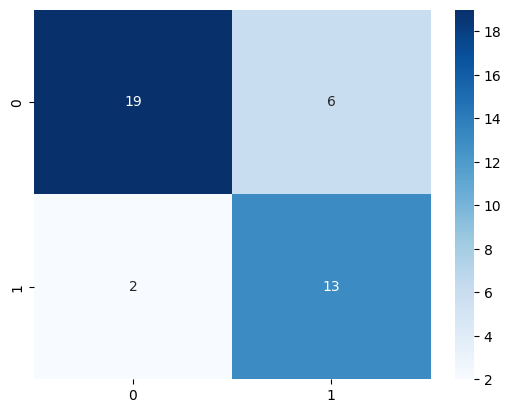

In [78]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicciones)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

- Aciertos del modelo:

Predijo correctamente a 19 clientes que se quedaron.

Predijo correctamente a 13 clientes que se fueron.

- Errores del modelo:

Falsos Positivos (6): Tu modelo pensó que 6 clientes se irían, pero se quedaron. Este es el "costo de la campaña de retención". Es un error aceptable.

Falsos Negativos (2): Tu modelo pensó que 2 clientes se quedarían, pero en realidad se fueron. Este es el peor error para el negocio, ¡y el modelo solo ha cometido 2! Es un resultado excelente.

### 3. Importancia de las variables

In [80]:
importancias = model.feature_importances_

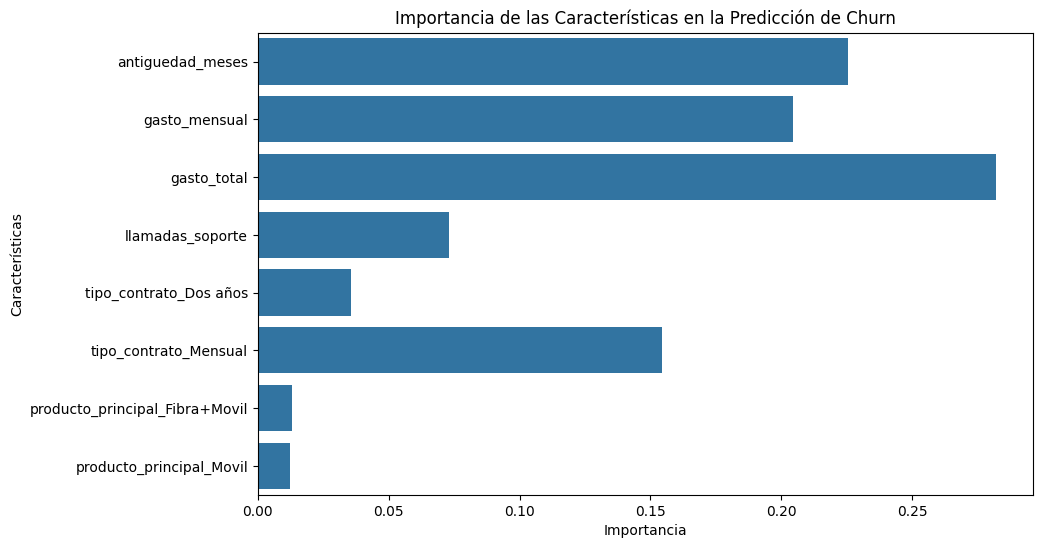

In [82]:
# Crearemos un gráfico de barras para visualizar la importancia de cada característica en la predicción del churn.
plt.figure(figsize=(10, 6))
sns.barplot(x=importancias, y=X_dummies.columns)
plt.title('Importancia de las Características en la Predicción de Churn')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.show()

###  Análisis de la Importancia de las Variables: 

El modelo está diciendo que, para decidir si un cliente se va a ir o no, se fija principalmente en estos cuatro factores, en este orden de importancia:

1. gasto_total (Gasto Total Histórico):

Interpretación: Esta es una medida del valor histórico del cliente. Un gasto_total alto suele estar correlacionado con una antigüedad_meses alta. Por sí solo, un gasto total bajo puede indicar un cliente nuevo y, por tanto, con mayor riesgo de irse antes de "engancharse" al servicio.

Insight para el negocio: "Los clientes que han invertido poco en nosotros a lo largo del tiempo son los que tienen más probabilidades de abandonarnos. Quizás no han percibido el valor de nuestros servicios a largo plazo."

2. antiguedad_meses (Antigüedad en Meses):

Interpretación: Este es un clásico. Cuanto menos tiempo lleva un cliente en la compañía, más fácil es que se vaya. Aún no ha desarrollado lealtad, está en un periodo de "prueba" y es más sensible a ofertas de la competencia.

Insight para el negocio: "Nuestros esfuerzos de retención deben ser máximos durante los primeros meses de vida de un cliente. Una campaña de bienvenida o un seguimiento proactivo a los 3 meses podría ser crucial."

3. gasto_mensual (Gasto Mensual):

Interpretación: Esta variable puede ser de doble filo.

Un gasto mensual muy alto puede llevar a insatisfacción por el precio y aumentar el riesgo de fuga.

Un gasto mensual muy bajo puede indicar un cliente poco comprometido con el ecosistema de la empresa.

Insight para el negocio: "Debemos analizar si los clientes que se van son los que más pagan. Si es así, podríamos tener un problema de precios o de percepción de valor en nuestros planes más caros. Si son los que menos pagan, quizás no estamos logrando hacerles upselling a servicios de mayor valor."

4. tipo_contrato_Mensual (Tipo de Contrato Mensual):

Interpretación: Esta es la variable categórica más importante. Un contrato mensual no tiene barreras de salida. El cliente puede irse en cualquier momento sin penalización, a diferencia de un contrato anual o de dos años.

Insight para el negocio: "Nuestra mayor sangría de clientes proviene, sin duda, de aquellos sin un compromiso a largo plazo. Una estrategia clave sería lanzar ofertas agresivas para migrar a los clientes de contratos mensuales a contratos anuales, quizás ofreciendo un descuento o un mes gratis a cambio de la permanencia."